In [1]:
%matplotlib inline

In [2]:
from pylab import *
from random import *
from scipy import *
from scipy import optimize
from matplotlib import *
import csv, sys
import re,pyfits,math
import numpy as np
ion()
from scipy import stats
from scipy.optimize import curve_fit
import scipy.interpolate
rcdefaults()
matplotlib.rc('font',family='Bitstream Vera Serif')
import pandas as pd
from pandas import datetime

In [3]:
def load_clean(i):
    tab = pd.read_excel('/Users/Rachel/Desktop/Apples/table2'+str(i)+'.xls', skiprows=1, skip_footer=2, na_values=['--','     N.A.'])
    df = pd.DataFrame(tab)
    df = df.dropna()
    df.columns = [i.strip() for i in df.columns]
    pattern = re.compile(r'\s+')
    df.columns = [re.sub(pattern, '', lab) for lab in df.columns]
    df = pd.melt(df, id_vars = ["Year"], value_vars = [u'Jan.', u'Feb.', u'Mar.', u'Apr.', u'May.', u'June', u'July',
                                                       u'Aug.', u'Sep.', u'Oct.', u'Nov.', u'Dec.'])
    return df

In [4]:
df = load_clean(1)
months = {'Apr.': 4, 'Aug.': 8, 'Dec.': 12, 'Feb.': 2, 'Jan.': 1, 'July': 7, 'June': 6, 'Mar.': 3, 'May.': 5, 'Nov.': 11, 'Oct.': 10, 'Sep.': 9}
df["month_number"] = df["variable"].map(months)
#df

In [5]:
FullTable = load_clean(0)
for i in range(1,4):
    df = load_clean(i)
    FullTable = FullTable.merge(df, on=['Year','variable'], how='inner')#, axis=1)#, join='inner')
    
FullTable["month_number"] = FullTable["variable"].map(months)    
FullTable = pd.DataFrame(FullTable.sort(['Year','month_number']))  #### sort by year --> need to figure out how to sort by month also
FullTable = FullTable.reset_index(drop=True)   #### reset the index after sort
FullTable = FullTable.apply(lambda x:x.fillna(x.value_counts().index[0]))   ### imputing for NAs
FullTable.columns = ['Year', 'Month', 'freshprice', 'redprice', 'freshstock', 'frozenstock','MonthNum']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [6]:
FullTable

,Year,Month,freshprice,redprice,freshstock,frozenstock,MonthNum
0,1980.0,Jan.,0.141,0.554,2226.463,83.908,1
1,1980.0,Feb.,0.149,0.574,1597.172,86.812,2
2,1980.0,Mar.,0.166,0.593,1046.602,81.099,3
3,1980.0,Apr.,0.170,0.634,651.180,68.875,4
4,1980.0,May.,0.179,0.974,3332.901,78.661,5
5,1980.0,June,0.210,0.701,140.178,55.784,6
6,1980.0,July,0.246,0.753,19.699,50.129,7
7,1980.0,Aug.,0.175,0.807,3.394,42.170,8
8,1980.0,Sep.,0.157,0.702,1550.085,36.022,9
9,1980.0,Oct.,0.125,0.570,4366.534,43.775,10


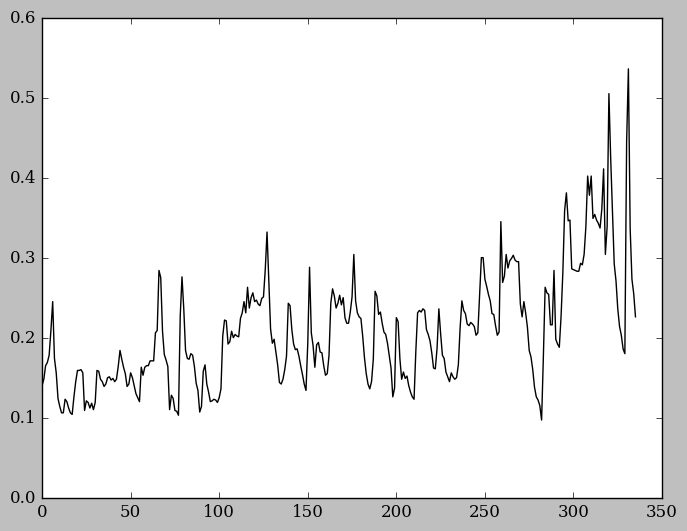

In [7]:
plot(FullTable['freshprice'],'k-')
#plot(FullTable['redprice'],'r-')
#plot(FullTable['freshstock'], 'b-')
#plot(FullTable['frozenstock'],'g-')
plt.show()

### ARIMA - single var

In [8]:
### http://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

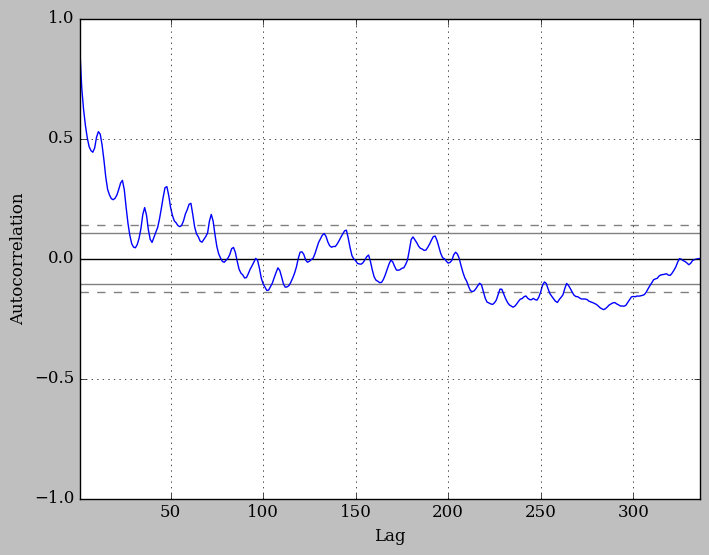

In [9]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(FullTable['freshprice'])
plt.show()

In [10]:
def parser(X,Y):
    return [datetime.strptime(str(int(x))+'-'+str(y), '%Y-%m') for x,y in zip(X,Y)]
FullTable['dates'] = parser(FullTable['Year'], FullTable['MonthNum'])
print FullTable['dates'][0:3]

0   1980-01-01
1   1980-02-01
2   1980-03-01
Name: dates, dtype: datetime64[ns]


In [390]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(np.asarray(FullTable['freshprice']), order=(5,1,0), dates=FullTable['dates'])#, exog=np.asarray(FullTable['redprice'], FullTable['frozenstock']))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  335
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 654.940
Method:                       css-mle   S.D. of innovations              0.034
Date:                Sat, 04 Feb 2017   AIC                          -1295.880
Time:                        14:25:51   BIC                          -1269.181
Sample:                    02-01-1980   HQIC                         -1285.236
                         - 12-01-2009                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0004      0.001      0.297      0.767        -0.002     0.003
ar.L1.D.y      0.1028      0.055      1.884      0.060        -0.004     0.210
ar.L2.D.y     -0.3062      0.055     -5.608      0.0

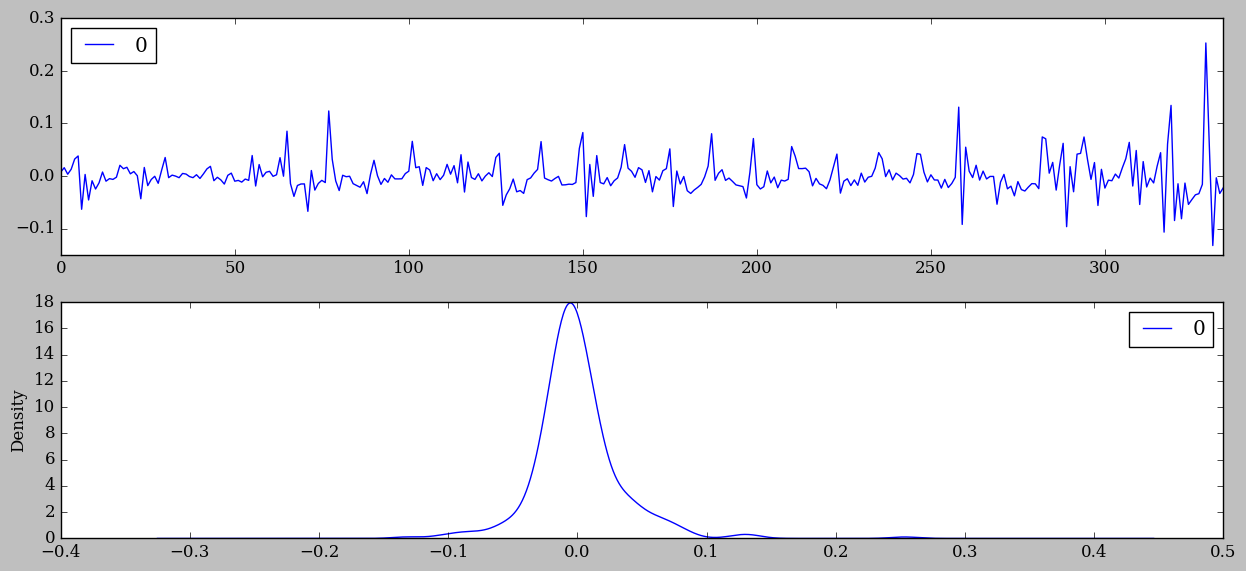

                0
count  335.000000
mean     0.000050
std      0.034291
min     -0.132336
25%     -0.015104
50%     -0.003667
75%      0.011677
max      0.253291


In [391]:
# plot residual errors
f, ((ax,bx)) = plt.subplots(2,1, figsize=(15,6.5))
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(ax=ax)
residuals.plot(ax=bx, kind='kde')
plt.show()
print(residuals.describe())

### Trained and tested model

In [12]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
X = np.asarray(FullTable['freshprice'])
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = 1.-mean_squared_error(test, predictions)
print('Test MSE: %.7f' % error)

Test MSE: 0.9967062


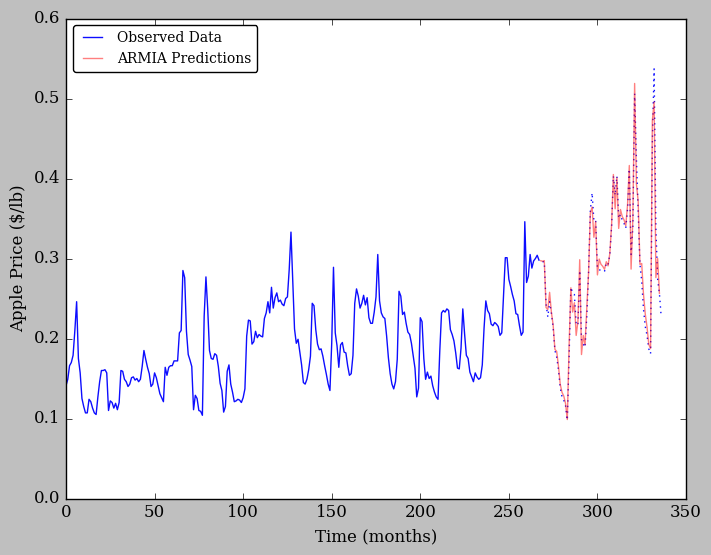

In [19]:
# plot
pyplot.plot(train, color='blue', label='Observed Data', alpha=0.95)
pyplot.plot(arange(0,len(test))+len(train)+1, test, color='blue', ls=':', alpha=0.95)
pyplot.plot(arange(0,len(test))+len(train), predictions, color='red', label='ARMIA Predictions', alpha=0.5)
plt.legend(fancybox=True, loc=2, prop={'size':10})
xlabel('Time (months)');ylabel('Apple Price ($/lb)') ### prices received by growers 
pyplot.show()

In [406]:
train_predictions = list()
for t in range(len(train)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    train_predictions.append(yhat)
    obs = train[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = 1.-mean_squared_error(train, train_predictions)
print('Train MSE: %.7f' % error)

//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Train MSE: 0.9992446


### VAR model

In [240]:
## http://conference.scipy.org/proceedings/scipy2011/pdfs/statsmodels.pdf
## http://statsmodels.sourceforge.net/devel/vector_ar.html`

In [340]:
import statsmodels.tsa.api
from statsmodels.tsa.base.datetools import dates_from_str

In [341]:
(asarray(FullTable['dates'][0:10]))

array(['1979-12-31T19:00:00.000000000-0500',
       '1980-01-31T19:00:00.000000000-0500',
       '1980-02-29T19:00:00.000000000-0500',
       '1980-03-31T19:00:00.000000000-0500',
       '1980-04-30T20:00:00.000000000-0400',
       '1980-05-31T20:00:00.000000000-0400',
       '1980-06-30T20:00:00.000000000-0400',
       '1980-07-31T20:00:00.000000000-0400',
       '1980-08-31T20:00:00.000000000-0400',
       '1980-09-30T20:00:00.000000000-0400'], dtype='datetime64[ns]')

In [374]:
### train here on subset of data to get forecast model
alldata = FullTable[['freshprice','freshstock','frozenstock']]
alldata.index = pd.DatetimeIndex((asarray(FullTable['dates'])))
alldata = np.log(alldata).diff().dropna()

s1, s2 = shape(alldata)
data = alldata[alldata.index<alldata.index[int(s1*0.8)]]
test = alldata[alldata.index>alldata.index[int(s1*0.8)]]

model = statsmodels.tsa.api.VAR(alldata)
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 04, Feb, 2017
Time:                     14:23:02
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.09713
Nobs:                     333.000    HQIC:                  -7.24152
Log likelihood:          -174.863    FPE:                0.000650831
AIC:                     -7.33728    Det(Omega_mle):     0.000611454
--------------------------------------------------------------------
Results for equation freshprice
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.001010         0.007523            0.134           0.893
L1.freshprice          0.090283         0.054506            1.656           0.099
L1.freshstock         -0.030697         0.005152   

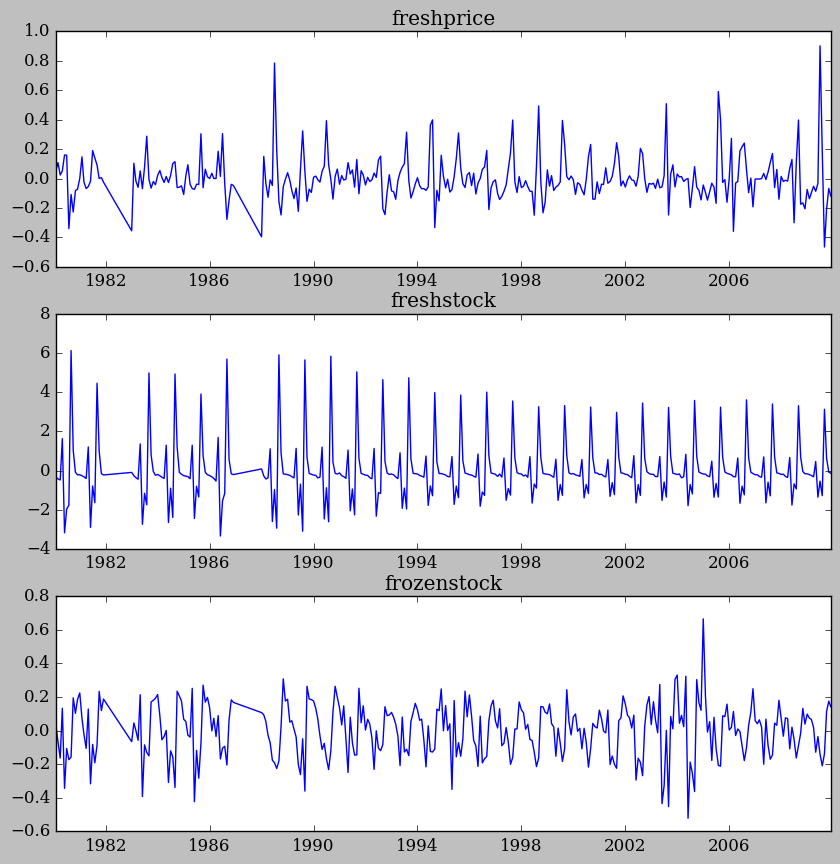

In [375]:
results.plot()
plt.show()

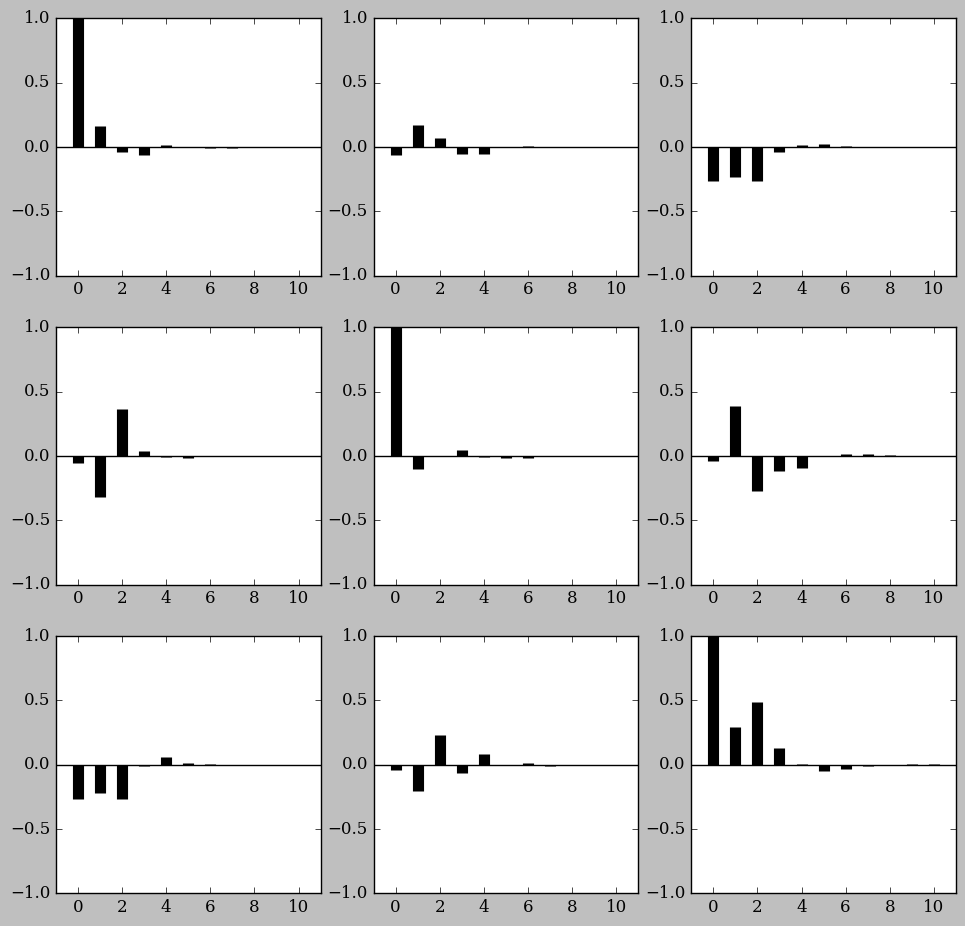

In [376]:
results.plot_acorr()
plt.show()

In [377]:
#model.select_order(15)

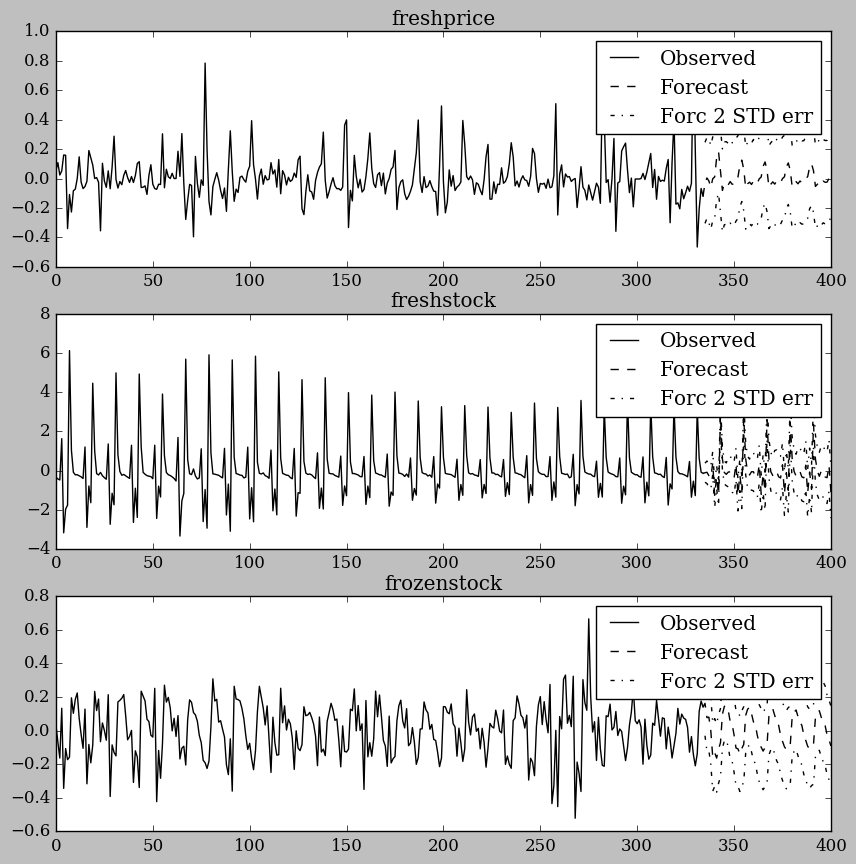

In [378]:
results2 = model.fit(maxlags=20, ic='aic', trend='c')
lag_order = results2.k_ar  ## 14
#results2.forecast(data.values[-lag_order:], 2)
#results2.plot_forecast(2)
results2.forecast(test.values, 66)
results2.plot_forecast(66)
plt.show()

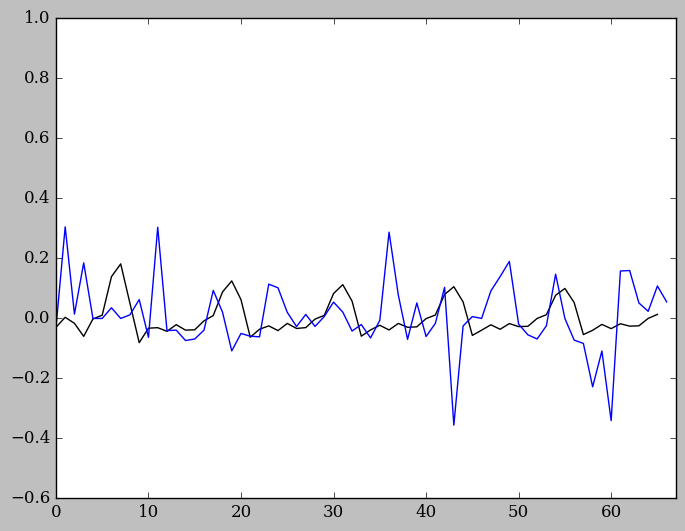

In [379]:
plot(arange(0,66), results2.forecast(test.values, 66).T[0],'k-')
plot(66-arange(0,len(alldata)), alldata['freshprice'], 'b-')
xlim(0,67)
plt.show()

//anaconda/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x11d9dc750>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
//anaconda/lib/python2.7/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x11d9dc4d0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


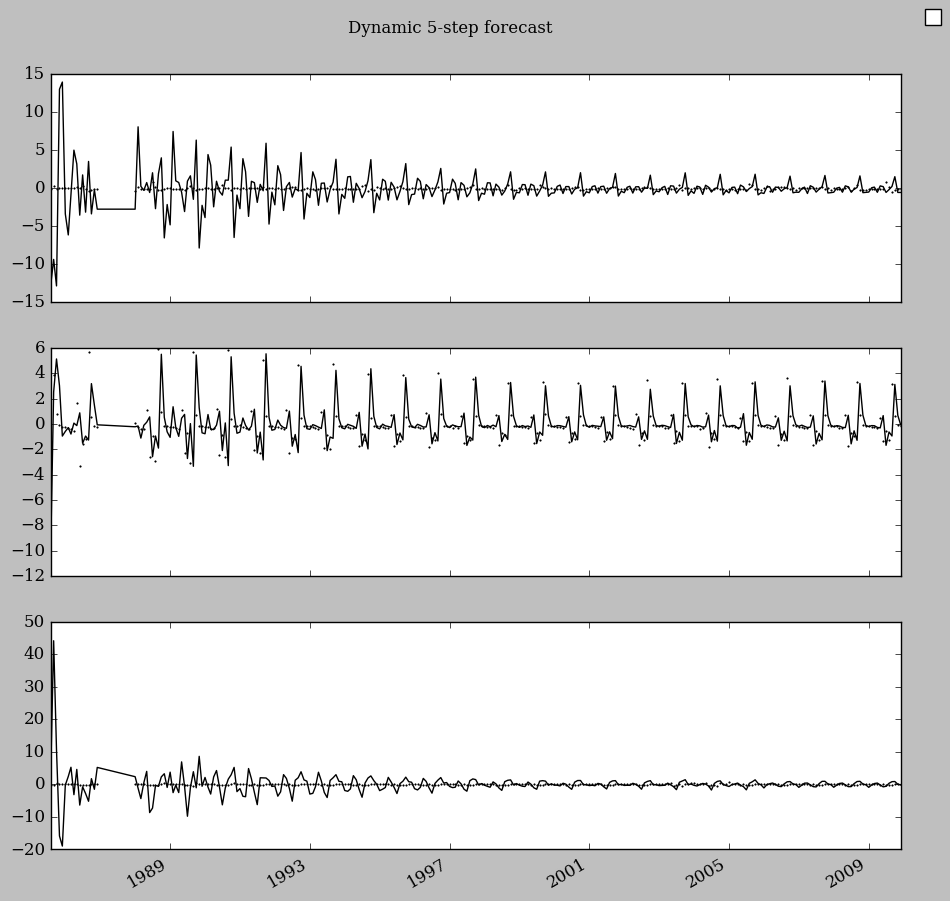

In [296]:
### forecast forward for rest of data...
### compare accuracy
var = statsmodels.tsa.vector_ar.dynamic.DynamicVAR(alldata, lag_order=lag_order, trend='ctt', window=2)#, window_type='rolling')
var.forecast(5)
var.plot_forecast(5)
plt.show()

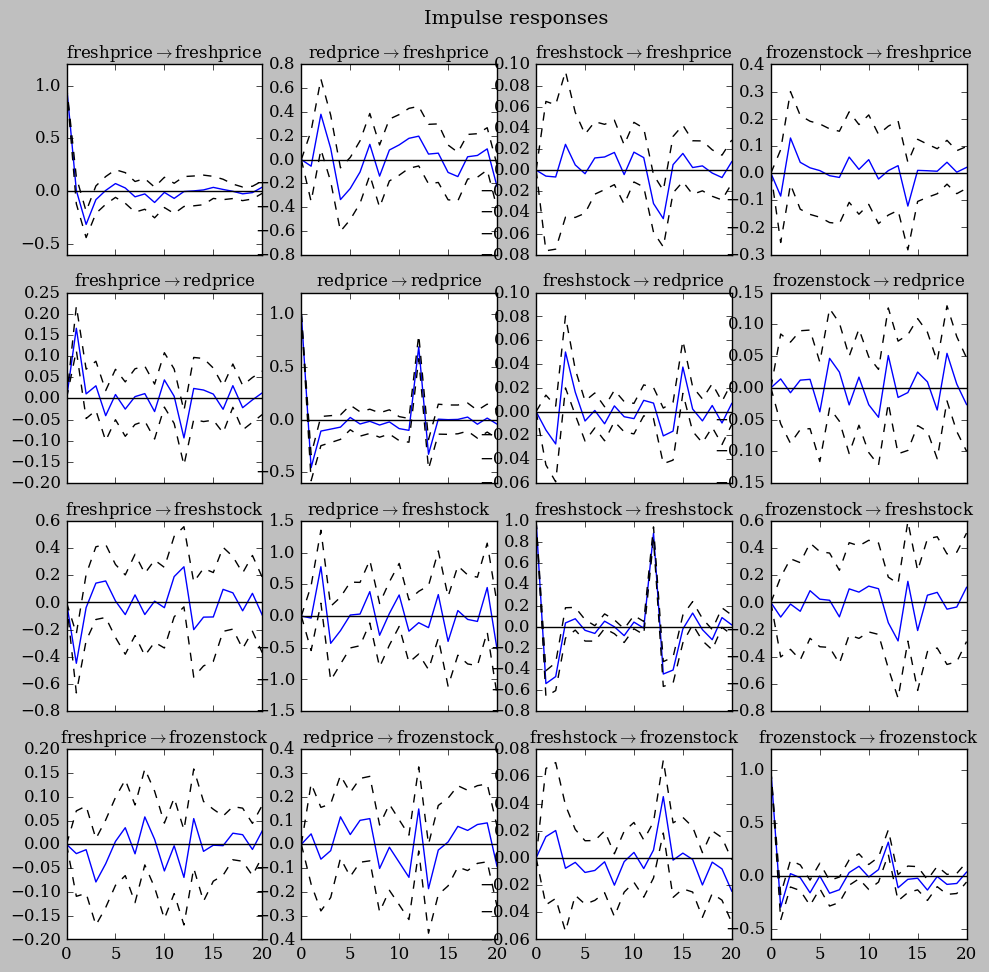

In [189]:
### Analysis of impulse responses (the effect of a unit shock to one variable on all of the others)
irf = results2.irf(20)
irf.plot(orth=False)
plt.show()

In [166]:
### One is often interested in whether a variable or group of variables is “causal” for another variable, 
### for some definition of “causal”.
results2.test_causality('freshprice', ['redprice', 'freshstock', 'frozenstock'], kind='f')

Granger causality f-test
   Test statistic   Critical Value          p-value          df
---------------------------------------------------------------
         1.598374         1.487039            0.026  (28, 1056)
H_0: ['freshstock', 'frozenstock'] do not Granger-cause freshprice
Conclusion: reject H_0 at 5.00% significance level


{'conclusion': 'reject',
 'crit_value': 1.4870393190302489,
 'df': (28, 1056),
 'pvalue': 0.02553645392452019,
 'signif': 0.05,
 'statistic': 1.5983744594849292}